# Exploration of Issue Data from React Repository

In [148]:
import operator
import json
import matplotlib.pyplot as plt
import seaborn as sns
from classifier import *
from issues import *

## Issue Data Summary

In [149]:
with open('data/react/react_issues_closed.json') as f:
    closed_issues = json.load(f)
print(str(len(closed_issues)) + ' closed issues')
with open('data/react/react_issues_open.json') as f:
    open_issues = json.load(f)
print(str(len(open_issues)) + ' open issues')

5575 closed issues
379 open issues


In [150]:
get_issue_by_title(closed_issues, "Extract react prop from ref")

[{'url': 'https://api.github.com/repos/facebook/react/issues/12903',
  'repository_url': 'https://api.github.com/repos/facebook/react',
  'labels_url': 'https://api.github.com/repos/facebook/react/issues/12903/labels{/name}',
  'comments_url': 'https://api.github.com/repos/facebook/react/issues/12903/comments',
  'events_url': 'https://api.github.com/repos/facebook/react/issues/12903/events',
  'html_url': 'https://github.com/facebook/react/issues/12903',
  'id': 326290102,
  'number': 12903,
  'title': 'Extract react prop from ref',
  'user': {'login': 'gk159yo',
   'id': 18729755,
   'avatar_url': 'https://avatars3.githubusercontent.com/u/18729755?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/gk159yo',
   'html_url': 'https://github.com/gk159yo',
   'followers_url': 'https://api.github.com/users/gk159yo/followers',
   'following_url': 'https://api.github.com/users/gk159yo/following{/other_user}',
   'gists_url': 'https://api.github.com/users/gk159yo/gists{/gist_

### Issues that are classified as trivial or documentation changes are labeled 'True', all other issues are labeled as 'False'.

Text(0.5,1,'open issue labels')

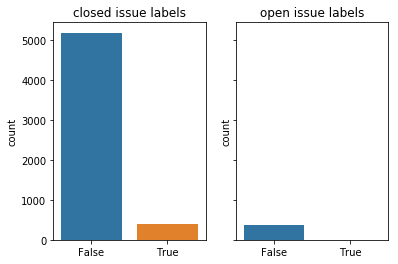

In [151]:
closed_labels = classify_issues(closed_issues)
open_labels = classify_issues(open_issues)

ig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(closed_labels, ax=ax1).set_title("closed issue labels")
sns.countplot(open_labels, ax=ax2).set_title("open issue labels")

In [152]:
pos_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if closed_labels[i]]
neg_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if not closed_labels[i]]
pos_issues_open = [issue for (i,issue) in enumerate(open_issues) if open_labels[i]]
neg_issues_open = [issue for (i,issue) in enumerate(open_issues) if not open_labels[i]]

## Exploration of Positive Labeled Issues

In [153]:
# Print a sample of positive label titles
print("positive label titles: ")
for issue in pos_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

positive label titles: 
	"fix docs rake "update_version" command to strip trailing spaces"
	"docs don't even mention reconciliation!"
	"better event docs"
	"few issues in the (upcoming) doc"
	"link to cdnjs in docs"
	"old jsfiddle links in docs"
	"generate docs using jsdoc (or something)."
	"react broken in safari 5.1.1"
	"support onmouseover"
	"docco-style documentation"
	"documentation - createclass and rendercomponent too vague, add more links"
	"get rid of sanitize dependency in docs"
	"docs nav header behaviour on different screen sizes"
	"update top level api docs for completeness."
	"add docs to "multiple components" page about how to communicate between parent and child"
	"[documentation] document usage of <select>"
	"better reactcsstransitiongroup docs"
	"better error display for docs live editor"
	"third party components section, also try to establish a standard."
	"tutorials docs section"


### The classifier misclassifies some examples as documentation/trivial issues that are more complex upon manual inspection. Example below is an issue that was flagged despite being a significant code change with a lot of discussion around it.

In [154]:
misclass_issue = get_issue_by_title(pos_issues_closed, "null props considered differently in getdefaultprops vs. isrequired")
print('title: ' + misclass_issue[0]['title'])
print('')
print('body: ' + misclass_issue[0]['body'])

title: null props considered differently in getdefaultprops vs. isrequired

body: in the case a `null` argument is passed to a property marked as `isrequired`:http://jsfiddle.net/jeanlauliac/0n6snb6b/1/we'll get a proper warning in the console: `warning: required prop `name` was not specified in `hello`.` (though it should probably be "prop was null" and not "prop was not specified", but anyway)on the other hand, the default value is only used when the prop is `undefined`, but not when it's `null`. is this the explicitly wanted behavior? if it is, then we should probably make the documentation explicit about it (http://facebook.github.io/react/docs/reusable-components.html), giving the entire responsibility to component callers of safeguarding against `null`.


## Exploration of Negative Labeled Issues

In [155]:
print("negative label titles: ")
for issue in neg_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

negative label titles: 
	"can't require() react-tools module"
	"write tests for react-tools module"
	"must adding comments for jsx?"
	"small update to bower command"
	"make valid npm release"
	"react in requirejs ?"
	"is es5-sham required for ie8?"
	"uncaught syntaxerror: unexpected token < "
	"work with compile-to-js languages (like coffeescript)"
	"the name "jsx" is already taken, use "xjs" instead?"
	"jsx not able to watch subdirs"
	"jsx page gives 404 - linked from "why react" blog post"
	"jsx whitespace coalescing should work like regular html"
	"automatically bind scope of all user provided methods."
	"jsx offline transform exits with error code 1 on any change (ubuntu 12.10)"
	"allow namespacing in component names in jsx"
	"ordering of componentdidmount events"
	"preserve line numbers in "grunt test""
	"grunt test just hangs"
	"bin/jsx should not relativize required module ids unless --relativize is passed"


### The classifier misses some examples that upon further inspection are clearly simple changes. Example below is an issue that was resolved by simply changing a single URL in a markdown file.

In [156]:
misclass_issue = get_issue_by_title(neg_issues_closed, 'jsx page gives 404 - linked from "why react" blog post')
print('title: ' + misclass_issue[0]['title'])
print('')
print('body: ' + misclass_issue[0]['body'])

title: jsx page gives 404 - linked from "why react" blog post

body: the following url is not found - http://facebook.github.io/react/blog/2013/06/05/facebook.github.io/react/docs/syntax.htmland it is linked from - http://facebook.github.io/react/blog/2013/06/05/why-react.html


## Comparsion of Issue Classes

In [157]:
neg_issues_freqs = sorted(get_word_freq_title(neg_issues_closed).items(), key=lambda x: x[1], reverse=True)
pos_issues_freqs = sorted(get_word_freq_title(pos_issues_closed).items(), key=lambda x: x[1], reverse=True)

# print top 20 words for negative issues
print("Top words in Negative Issues: ")
for (word, freq) in neg_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issues: ")
for (word, freq) in pos_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issues: 
	react: 0.021716989190787527
	component: 0.010349245983506917
	error: 0.008082268291881592
	event: 0.0059467095968722275
	using: 0.005913854847718237
	dom: 0.005618162105332326
	render: 0.0052567598646384335
	jsx: 0.005158195617176463
	components: 0.004665374379866609
	input: 0.004665374379866609
	use: 0.004632519630712619
	should: 0.004632519630712619
	be: 0.004599664881558629
	add: 0.004533955383250649
	property: 0.004533955383250649
	rendering: 0.004402536386634688
	element: 0.004369681637480698
	support: 0.004172553142556756
	attribute: 0.003975424647632815
	if: 0.0037125866544008936
	work: 0.0036797319052469034
	state: 0.0036797319052469034
	update: 0.003614022406938923
	value: 0.003614022406938923
	props: 0.0033840391628609918
	html: 0.003285474915399021
	cannot: 0.003285474915399021
	function: 0.0032197654170910404
	can: 0.0030554916713210895

Top words in Positive Issues: 
	docs: 0.04932301740812379
	documentation: 0.0304642166344294
	react: 0.021

In [158]:
#TODO: compare average, median, etc. amount of code in each class of issue. Can be found by length of strings within ''' '''

408
67
94
130
245
143
526
918
566
340
211
208
543
107
921
468
407
93
189
258
265
12
234
731
611
365
149
18
256
215
522
767
386
333
697
548
0
3227
155
798
377
840
10
288
227
0
109
32
268
217
986
412
227
731
129
17
166
315
120
698
170
45
206
712
426
66
83
378
300
708
29
307
0
157
541
131
1850
205
374
383
23
965
987
157
645
1456
703
639
117
270
63
111
725
201
484
316
449
97
98
987
384
333
1805
0
185
822
702
71
1018
1172
243
126
620
406
272
419
193
121
672
302
111
321
703
141
46
507
197
363
716
510
266
367
0
171
330
383
690
266
461
72
907
220
335
293
294
210
188
144
94
300
350
734
144
168
1311
0
331
530
451
70
642
1053
77
380
221
622
840
288
734
1280
0
674
0
46
522
831
332
133
684
299
375
0
0
314
0
110
29
1538
102
0
6703
693
830
95
102
132
290
207
117
1818
0
794
135
122
838
487
2839
94
381
274
244
1784
1351
241
0
330
0
718
1220
62
0
736
33
479
658
253
1746
1610
228
0
420
1571
893
188
110
76
537
2566
2727
369
347
129
107
263
18490
65
0
2763
0
532
611
1015
314
41
67
222
685
689
531
834
418
1

527
1003
524
565
112
3398
320
749
762
655
267
255
1252
965
136
444
940
1474
249
517
344
420
393
366
1196
2270
318
0
0
167
1200
753
1222
897
460
816
789
885
664
2737
1263
1614
771
462
1567
591
467
983
1605
3546
690
771
1654
3133
402
276
413
721
647
843
165
679
525
996
1346
718
519
933
1970
722
2121
147
188
354
90
771
1959
268
371
137
736
1203
279
2093
326
416
506
447
537
240
879
1540
1578
654
492
230
173
1790
322
284
0
2190
128
1240
385
442
678
1255
281
348
4772
2767
1358
175
1409
22469
279
291
1044
82
331
105
282
660
268
351
72
716
2182
574
438
1028
1334
172
422
1245
216
1040
140
244
201
317
1564
339
400
2249
1433
373
649
815
734
179
2521
941
1713
97
778
486
553
224
470
491
235
1029
767
540
168
218
1971
620
573
707
1458
550
235
1438
255
2410
755
1129
790
530
1977
54
541
260
235
635
588
465
1128
450
361
410
419
265
366
1037
305
2530
570
2154
451
222
462
327
3360
166
166
1147
1135
632
114
134
1022
816
432
197
930
539
83
389
218
419
785
679
848
410
778
634
411
4812
573
239
247
251
2036
77

976
1248
151
984
2303
1062
295
259
1121
522
1246
822
539
449
3821
1694
903
695
1164
1436
243
1306
464
431
619
619
533
835
299
662
128
127
961
1858
1374
1540
1280
66
122
258
449
696
209
271
966
269
347
412
794
3462
722
1038
964
299
283
910
530
427
517
0
640
294
108
235
728
571
583
495
636
962
338
802
1887
3877
1137
1558
1015
1025
1533
1877
309
1056
902
872
299
1104
203
406
193
156
772
2333
605
614
214
2095
1186
316
247
30
340
709
363
775
568
452
468
331
2666
8073
679
1123
1188
284
510
260
963
1217
1211
757
1043
1025
139
794
699
684
0
1985
214
1589
373
461
1030
449
281
491
606
1054
1735
1877
2961
2113
915
196
574
1340
131
746
268
658
1189
1914
314
1956
876
659
180
1418
1645
200
1180
1073
98
435
780
2526
255
710
765
1587
303
128
1640
276
276
547
2956
180
319
752
1516
2179
1535
1478
281
1926
1612
358
2005
789
188
449
449
124
601
1365
760
119
4087
1202
489
782
449
518
197
449
767
912
1128
974
0
41
164
825
1208
1575
3015
1592
437
449
749
434
616
1187
1555
1422
671
475
649
2787
237
221
1171
1

Text(0.5,1,'neg issue body length')

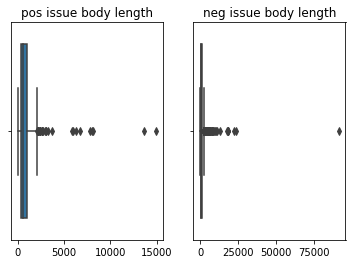

In [159]:
#TODO: compare average, median, etc. lengths of issues bodies for each class.
ig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for issue in neg_issues_closed:
    print(len(issue['body']))
sns.boxplot([len(issue['body']) for issue in pos_issues_closed], ax=ax1).set_title("pos issue body length")
sns.boxplot([len(issue['body']) for issue in neg_issues_closed], ax=ax2).set_title("neg issue body length")

In [160]:
#TODO: average, median, etc. number of comments on issues for each class

In [161]:
#TODO: other statistics that may be meaningful?????